In [1]:
import numpy as np
import matplotlib.pyplot as plt
import corner as corner

import utils as ut

%reload_ext autoreload
%autoreload 2

/home/mpieroni/.pyenv/versions/3.10.9/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
ls KL_data/

100/  1000/  10000/  200/  2000/  20000/  500/  5000/  old/


In [3]:
train_data = np.array([100, 200, 500, 1000, 2000, 5000, 10000, 20000]) #
linestyles = ['-', '--', '-.', ':']
colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7']

In [4]:
num_epochs = 1000
check_every = 10
example_name = "gaussian_mixture"

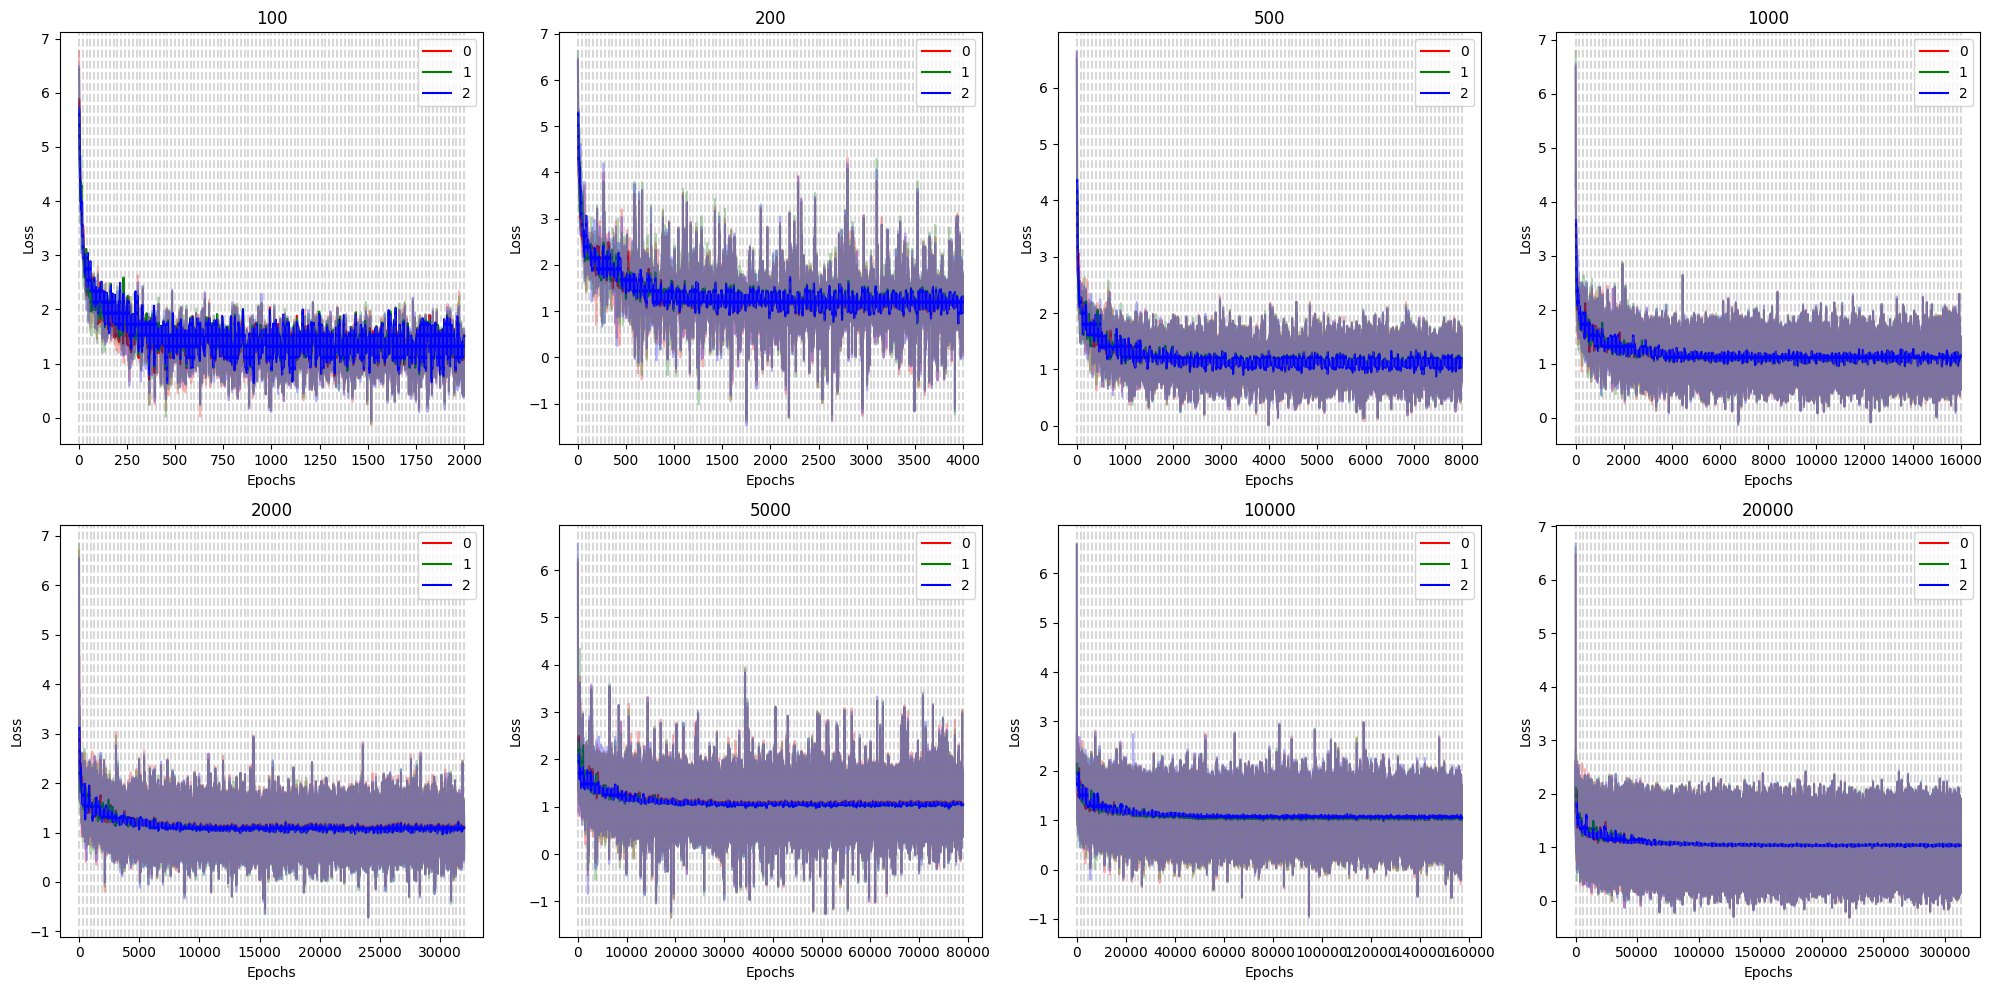

In [5]:

fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for i in range(len(train_data)):
    num_train = train_data[i]
    data = np.load('KL_data/'+str(num_train)+'/'+example_name + f"_{num_epochs}_{check_every}.npz")
    ut.plot_losses(data['train'], data['val'], check_every, ax=ax[int(i/4)][i%4])  
    ax[int(i/4)][i%4].set_title(num_train) 
    ax[int(i/4)][i%4].set_xlabel('Epochs')
    ax[int(i/4)][i%4].set_ylabel('Loss')

fig.tight_layout()
   
# data = np.load('KL_data/'+int()+'/'+example_name + f"_{num_epochs}_{check_every}.npz")
# sbi.plot_losses(data['train'], data['val'], check_every)  
# plt.title(int(num_epochs)) 

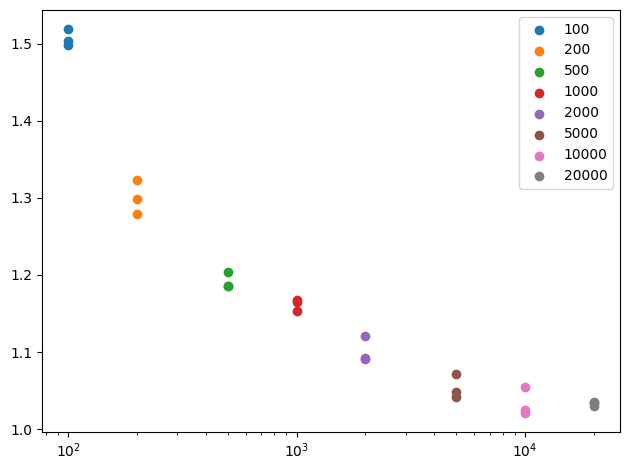

In [6]:
for i in range(len(train_data)):
    num_train = train_data[i]
    data = np.load('KL_data/'+str(num_train)+'/'+example_name + f"_{num_epochs}_{check_every}.npz")
    plt.scatter([num_train for i in range(3)], data['val'][:,-1], label=num_train)

plt.xscale('log')
plt.legend()
plt.tight_layout()

In [7]:
data['KL'].shape

(100, 3)

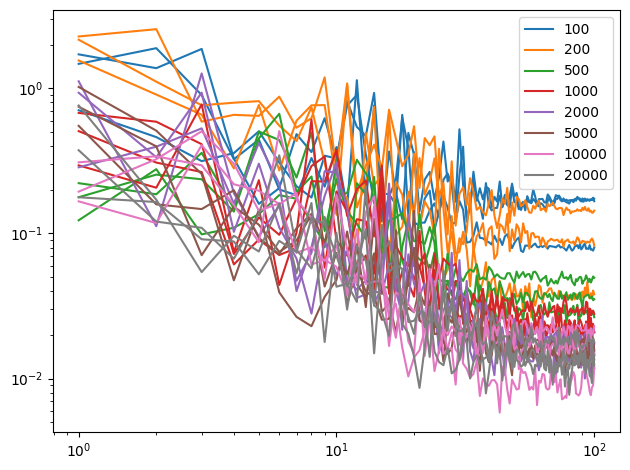

In [8]:

for i in range(len(train_data)):
    num_train = train_data[i]
    data = np.load('KL_data/'+str(num_train)+'/'+example_name + f"_{num_epochs}_{check_every}.npz")
    for j in range(3):
        if j == 0:
            plt.loglog(np.arange(len(data['KL'][:,j]))+1, data['KL'][:,j], label=str(num_train), color=colors[i])
        else:
            plt.loglog(np.arange(len(data['KL'][:,j]))+1, data['KL'][:,j], color=colors[i])

plt.legend()
plt.tight_layout()

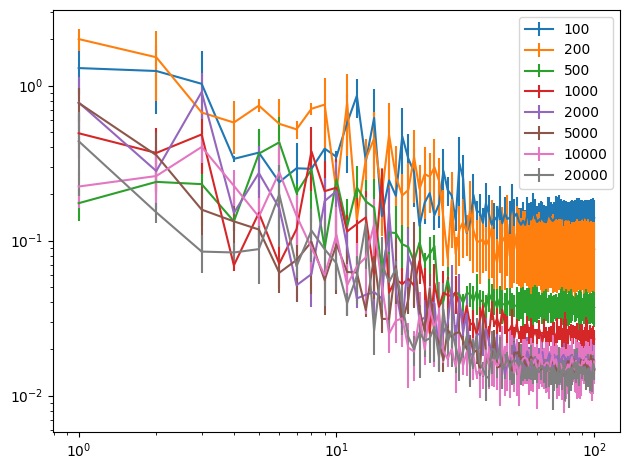

In [9]:

for i in range(len(train_data)):
    num_train = train_data[i]
    data = np.load('KL_data/'+str(num_train)+'/'+example_name + f"_{num_epochs}_{check_every}.npz")
    
    mean = np.mean(data['KL'], axis=-1)
    std = np.std(data['KL'], axis=-1)
    
    plt.errorbar(np.arange(len(data['KL'][:,j]))+1, mean, yerr=std, label=str(num_train), color=colors[i])

plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.tight_layout()

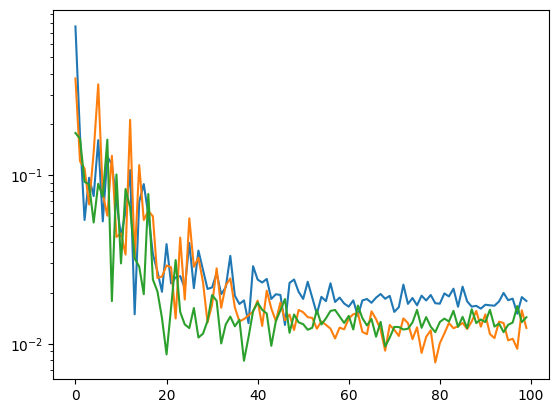

In [10]:
plt.semilogy(data['KL'])

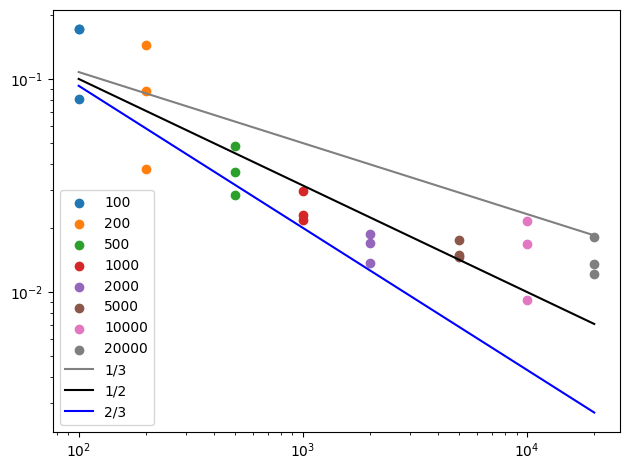

In [11]:
from cProfile import label


for i in range(len(train_data)):
    num_train = train_data[i]
    data = np.load('KL_data/'+str(num_train)+'/'+example_name + f"_{num_epochs}_{check_every}.npz")
    
    plt.scatter([num_train for i in range(3)], np.mean(data['KL'][-30:,:], axis=0), label=num_train)


plt.loglog(train_data, train_data**(-1/3) / 2, 'grey', label='1/3')

plt.loglog(train_data, train_data**(-1/2), 'black' , label='1/2')

plt.loglog(train_data, 2/ train_data**(2/3), 'blue' , label='2/3')


plt.xscale('log')
plt.legend()
plt.tight_layout()

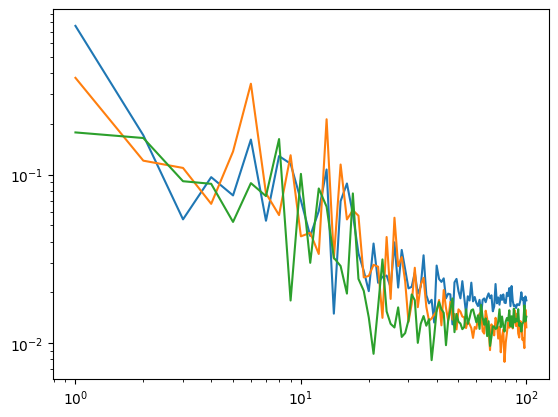

In [12]:
for j in range(3):
    plt.loglog(np.arange(len(data['KL'][:,j]))+1, data['KL'][:,j])

# mean = np.mean(data['KL'], axis=-1)
# std = np.std(data['KL'], axis=-1)

# plt.errorbar(np.arange(len(mean))+1, mean, yerr=std, label=str(num_train), color=colors[i])

# plt.xscale('log')
# plt.yscale('log')
# plt.legend()
# plt.tight_layout()

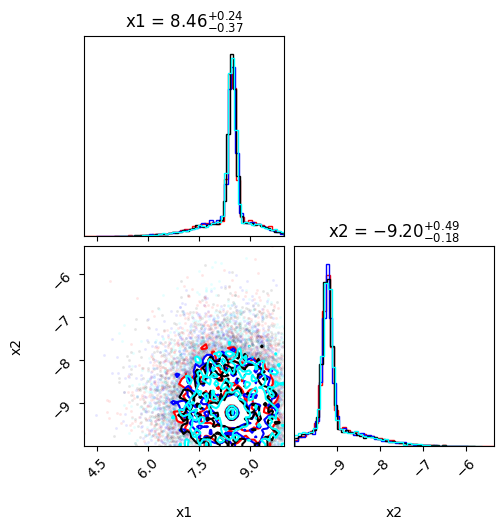

In [13]:
import sbibm

i_obs = 9

example_name = "gaussian_mixture"
task = sbibm.get_task(example_name)
prior = task.get_prior_dist()
simulator = task.get_simulator()
observation = task.get_observation(num_observation=i_obs+1)
data_test = np.array(task.get_reference_posterior_samples(num_observation=i_obs+1))


fig = corner.corner(data['post_samples'][i_obs,0], labels=['x1', 'x2'], show_titles=True, color='red', bins=50, smooth=.5, hist_kwargs={'density': True});

fig = corner.corner(data['post_samples'][i_obs,1], labels=['x1', 'x2'], show_titles=True, color='blue', fig=fig, bins=50, smooth=.5, hist_kwargs={'density': True});

corner.corner(data['post_samples'][i_obs,2], labels=['x1', 'x2'], show_titles=True, color='black', fig=fig, bins=50, smooth=.5, hist_kwargs={'density': True});

corner.corner(data_test, labels=['x1', 'x2'], show_titles=True, color='cyan', fig=fig, bins=50, smooth=.5, hist_kwargs={'density': True});

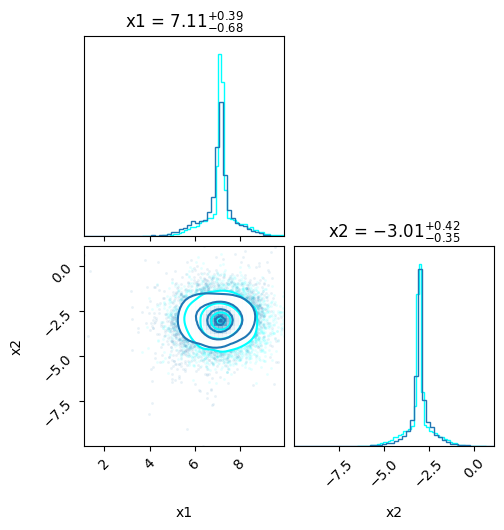

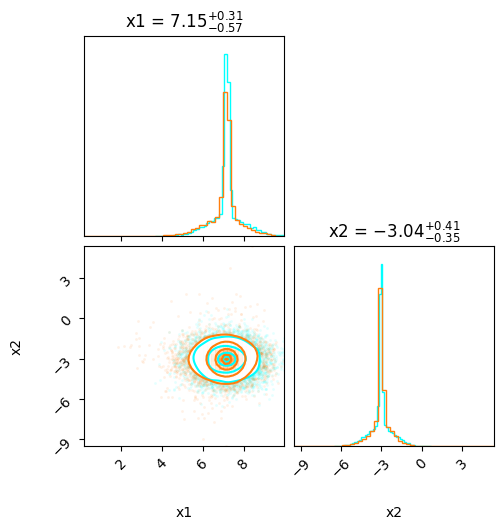

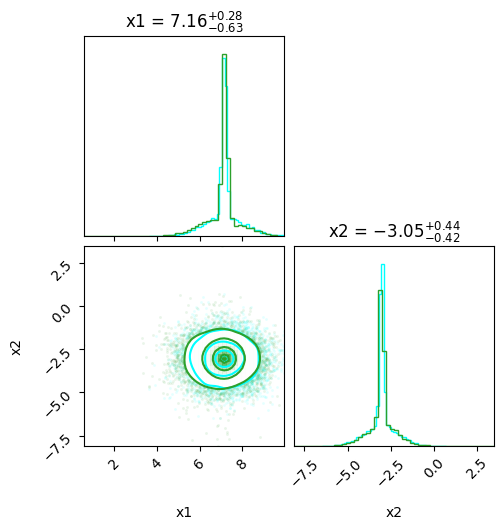

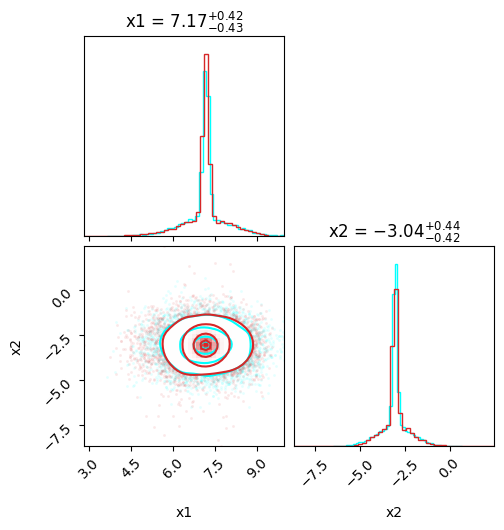

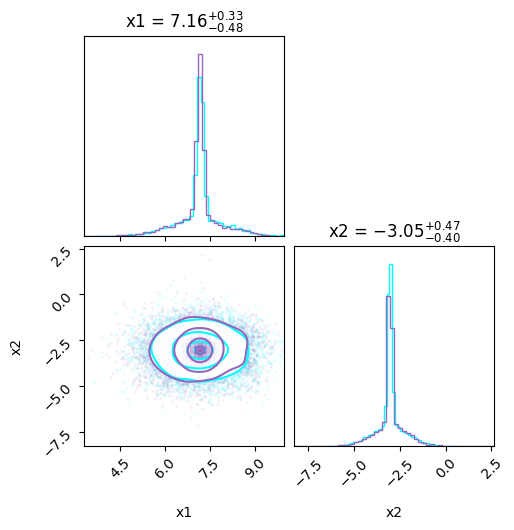

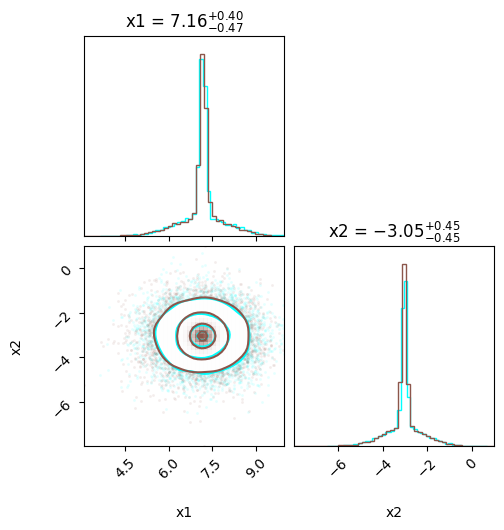

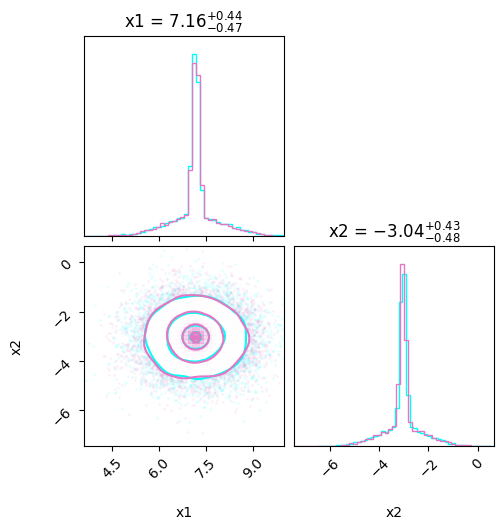

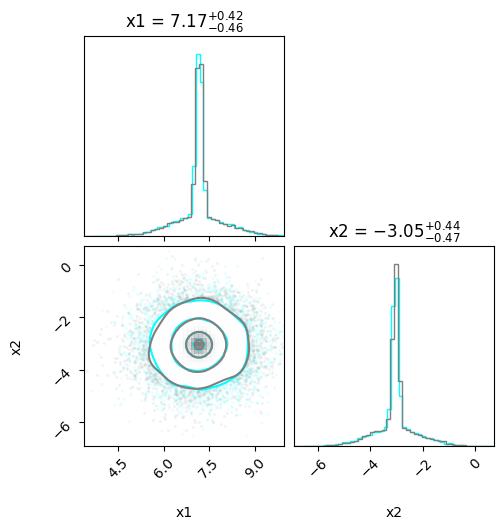

In [14]:
import sbibm
import matplotlib.lines as mlines

i_obs = 2

example_name = "gaussian_mixture"
task = sbibm.get_task(example_name)
prior = task.get_prior_dist()
simulator = task.get_simulator()
observation = task.get_observation(num_observation=i_obs+1)
data_test = np.array(task.get_reference_posterior_samples(num_observation=i_obs+1))




for i in range(len(train_data)):
    num_train = train_data[i]
    data = np.load('KL_data/'+str(num_train)+'/'+example_name + f"_{num_epochs}_{check_every}.npz")
    
    fig = corner.corner(data_test, labels=['x1', 'x2'], show_titles=True, color='cyan', bins=50, smooth=2, hist_kwargs={'density': True});
    
    corner.corner(data['post_samples'][i_obs,0], labels=['x1', 'x2'], show_titles=True, color=colors[i], bins=50, smooth=2, hist_kwargs={'density': True}, fig=fig);



# plt.legend(
#     handles=[
#         mlines.Line2D([], [], color=colors[i], label=str(train_data[i]))
#         for i in range(len(train_data))
#     ],
#     fontsize=12, frameon=False,
#     bbox_to_anchor=(1, 2), loc="upper right"
# )
    
# fig = corner.corner(data['post_samples'][i_obs,1], labels=['x1', 'x2'], show_titles=True, color='blue', fig=fig, bins=50, smooth=.5, hist_kwargs={'density': True});

# corner.corner(data['post_samples'][i_obs,2], labels=['x1', 'x2'], show_titles=True, color='black', fig=fig, bins=50, smooth=.5, hist_kwargs={'density': True});

